# Cut Optimizations Notebook

## Importing packages and setting up containers

In [51]:
from h5py import File
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import random
import itertools as it
import time
import joblib

In [9]:
#folder_name = '2ooAllhighest_dist'
#folder_name = '3oo5highest_dist'
#folder_name = '3ooAllhighest_dist'
folder_name = '4oo5highest_dist'
#folder_name = '4oo6highest_dist'
#folder_name = '4ooAllhighest_dist'

In [10]:
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

## Discriminant Variable (MLPL) Overlayed Histograms & Cut Suggestions

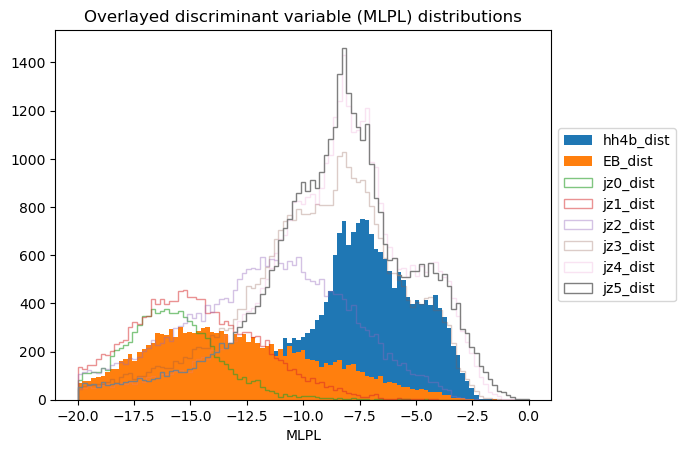

In [11]:
"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled')
plt.hist(EB_dist, bins, alpha=1, label='EB_dist', histtype='stepfilled')
plt.hist(jz0_dist, bins, alpha=0.6, label='jz0_dist', histtype='step')
plt.hist(jz1_dist, bins, alpha=0.5, label='jz1_dist', histtype='step')
plt.hist(jz2_dist, bins, alpha=0.4, label='jz2_dist', histtype='step')
plt.hist(jz3_dist, bins, alpha=0.3, label='jz3_dist', histtype='step')
plt.hist(jz4_dist, bins, alpha=0.2, label='jz4_dist', histtype='step')
plt.hist(jz5_dist, bins, alpha=1, label='jz5_dist', histtype='step')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed discriminant variable (MLPL) distributions")
plt.xlabel("MLPL")
plt.show()

In [5]:
print ("Ideally, we want to lose 0% (as small percentage as we can) of the signal and keep 0% (as small percentage as we can) of the backrground\n")
print("---------------------------\n")
cuts = np.arange(-15,10,0.5)
for i in cuts:
    print("For a " + str(i) + " MLPL cut we: \n" 
          "keep " + str((np.array(hh4b_dist) > i).sum() / len(hh4b_dist) * 100) + "% of the hh->4b signal\n"
          "lose " + str((np.array(EB_dist) < i).sum() / len(EB_dist) * 100) + "% of the EB_data sample\n"
          "reject " + str((np.array(jz0_dist) < i).sum() / len(jz0_dist) * 100) + "% of the dijet (jz0) background\n"
          "reject " + str((np.array(jz1_dist) < i).sum() / len(jz1_dist) * 100) + "% of the dijet (jz1) background\n"
          "reject " + str((np.array(jz2_dist) < i).sum() / len(jz2_dist) * 100) + "% of the dijet (jz2) background\n"
          "reject " + str((np.array(jz3_dist) < i).sum() / len(jz3_dist) * 100) + "% of the dijet (jz3) background\n"
          "reject " + str((np.array(jz4_dist) < i).sum() / len(jz4_dist) * 100) + "% of the dijet (jz4) background\n"
          "reject " + str((np.array(jz5_dist) < i).sum() / len(jz5_dist) * 100) + "% of the dijet (jz5) background\n"
          "______________________________________________________________________________________________________\n"
         )

Ideally, we want to lose 0% (as small percentage as we can) of the signal and keep 0% (as small percentage as we can) of the backrground

---------------------------

For a -15.0 MLPL cut we: 
keep 99.99495051504746% of the hh->4b signal
lose 2.5776415147902116% of the EB_data sample
reject 2.7090592334494774% of the dijet (jz0) background
reject 3.5494059257031134% of the dijet (jz1) background
reject 2.2933467741935485% of the dijet (jz2) background
reject 0.9670940064968878% of the dijet (jz3) background
reject 0.6788146678093004% of the dijet (jz4) background
reject 0.904728361363036% of the dijet (jz5) background
______________________________________________________________________________________________________

For a -14.5 MLPL cut we: 
keep 99.99495051504746% of the hh->4b signal
lose 3.151081587463805% of the EB_data sample
reject 4.024390243902439% of the dijet (jz0) background
reject 4.552062966862184% of the dijet (jz1) background
reject 2.564264112903226% of the dijet (j

## Jet Multiplicities Histograms

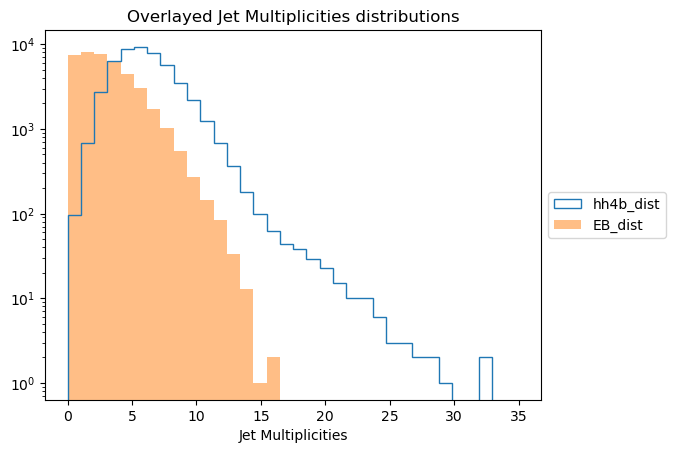

In [7]:
"""Jet Multiplicities Overlayed Histograms"""
bins = np.linspace(0, 35, 35)

EB_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/EBdata_multiplicities.sav')
hh4b_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/hh4b_multiplicities.sav')
jz0_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz0_multiplicities.sav')
jz1_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz1_multiplicities.sav')
jz2_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz2_multiplicities.sav')
jz3_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz3_multiplicities.sav')
jz4_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz4_multiplicities.sav')
jz5_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz5_multiplicities.sav')

plt.hist(hh4b_multiplicities, bins, alpha=1, label='hh4b_dist', histtype='step')
plt.hist(EB_multiplicities, bins, alpha=0.5, label='EB_dist', histtype='stepfilled')
#plt.hist(jz0_multiplicities, bins, alpha=1, label='jz0_dist', histtype='step')
#plt.hist(jz1_multiplicities, bins, alpha=0.5, label='jz1_dist', histtype='step')
#plt.hist(jz2_multiplicities, bins, alpha=0.4, label='jz2_dist', histtype='step')
#plt.hist(jz3_multiplicities, bins, alpha=0.3, label='jz3_dist', histtype='step')
#plt.hist(jz4_multiplicities, bins, alpha=0.2, label='jz4_dist', histtype='step')
#plt.hist(jz5_multiplicities, bins, alpha=0.5, label='jz5_dist', histtype='step')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed Jet Multiplicities distributions")
plt.xlabel("Jet Multiplicities")
plt.yscale("log")
plt.show()

## ROC Curve Implementations 

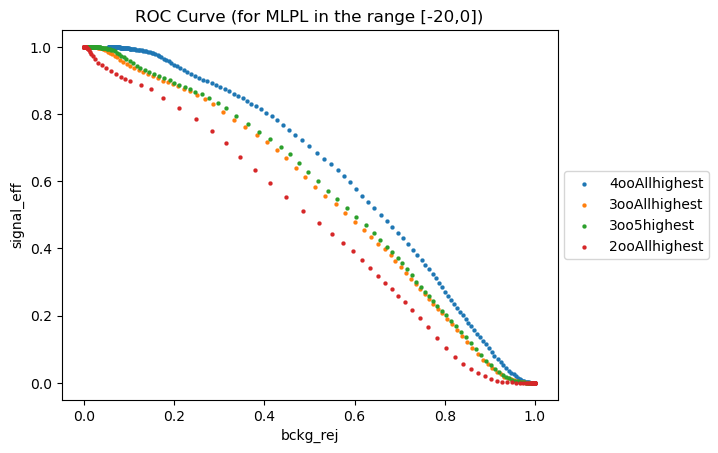

In [8]:
"""Implementation of the ROC Curve"""
cut_array = np.linspace(-20, 0, num=201)
slice_no = 5

sig_4ooAllhighest = joblib.load('./' + '1st_dist_outputs/' + '/hh4b_dist_nofake.sav')
bckg_4ooAllhighest = joblib.load('./' + '1st_dist_outputs' + '/jz' + str(slice_no) +'_dist.sav')
sig_3ooAllhighest = joblib.load('./' + '3ooAllhighest_dist' + '/hh4b_dist_nofake.sav')
bckg_3ooAllhighest = joblib.load('./' + '3ooAllhighest_dist' + '/jz' + str(slice_no) +'_dist.sav')
sig_3oo5highest = joblib.load('./' + '3oo5highest_dist' + '/hh4b_dist_nofake.sav')
bckg_3oo5highest = joblib.load('./' + '3oo5highest_dist' + '/jz' + str(slice_no) +'_dist.sav')
sig_2ooAllhighest = joblib.load('./' + '2ooAllhighest_dist' + '/hh4b_dist_nofake.sav')
bckg_2ooAllhighest = joblib.load('./' + '2ooAllhighest_dist' + '/jz' + str(slice_no) +'_dist.sav')

eff_4ooAllhighest = []
rej_4ooAllhighest = []
eff_3ooAllhighest = []
rej_3ooAllhighest = []
eff_3oo5highest = []
rej_3oo5highest = []
eff_2ooAllhighest = []
rej_2ooAllhighest = []

random_y = []
random_x = []
c = 0

for i in cut_array:
    c += 1/201
    random_y.append(c)
    random_x.append(c)
    eff_4ooAllhighest.append((np.array(sig_4ooAllhighest) > i).sum() / len(sig_4ooAllhighest))
    rej_4ooAllhighest.append((np.array(bckg_4ooAllhighest) < i).sum() / len(bckg_4ooAllhighest))
    eff_3ooAllhighest.append((np.array(sig_3ooAllhighest) > i).sum() / len(sig_3ooAllhighest))
    rej_3ooAllhighest.append((np.array(bckg_3ooAllhighest) < i).sum() / len(bckg_3ooAllhighest))
    eff_3oo5highest.append((np.array(sig_3oo5highest) > i).sum() / len(sig_3oo5highest))
    rej_3oo5highest.append((np.array(bckg_3oo5highest) < i).sum() / len(bckg_3oo5highest))
    eff_2ooAllhighest.append((np.array(sig_2ooAllhighest) > i).sum() / len(sig_2ooAllhighest))
    rej_2ooAllhighest.append((np.array(bckg_2ooAllhighest) < i).sum() / len(bckg_2ooAllhighest))

plt.scatter(rej_4ooAllhighest,eff_4ooAllhighest, alpha = 1, linewidths=0.1, marker = '.', label = '4ooAllhighest')
plt.scatter(rej_3ooAllhighest,eff_3ooAllhighest, alpha = 1, linewidths=0.1, marker = '.', label = '3ooAllhighest')
plt.scatter(rej_3oo5highest,eff_3oo5highest, alpha = 1, linewidths=0.1, marker = '.', label = '3oo5highest')
plt.scatter(rej_2ooAllhighest,eff_2ooAllhighest, alpha = 1, linewidths=0.1, marker = '.', label = '2ooAllhighest')
#plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

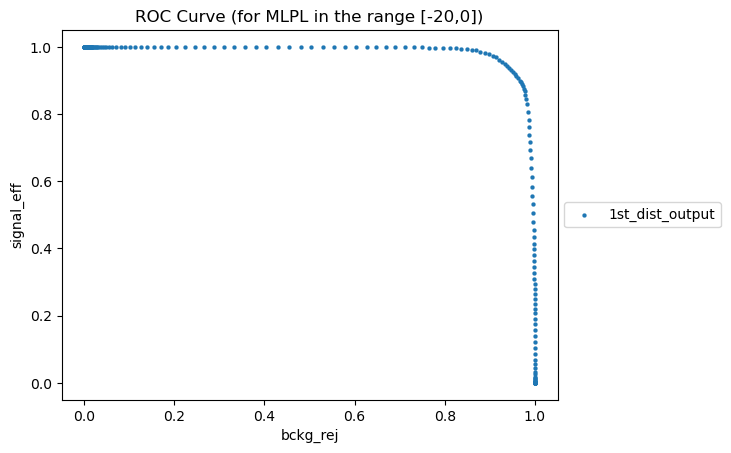

In [9]:
""" A parallel implementation of the ROC Curve """ 
cut_array = np.linspace(-20, 0, num=201)

signal = np.histogram(hh4b_dist, cut_array)[0]
background = np.histogram(jz0_dist, cut_array)[0]

sigeff = ( signal.sum() - signal[:].cumsum() ) / signal.sum()
bckgrej = background[:].cumsum() / background.sum()

plt.scatter(bckgrej,sigeff, alpha = 1, linewidths=0.1, marker = '.', label = '1st_dist_output')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

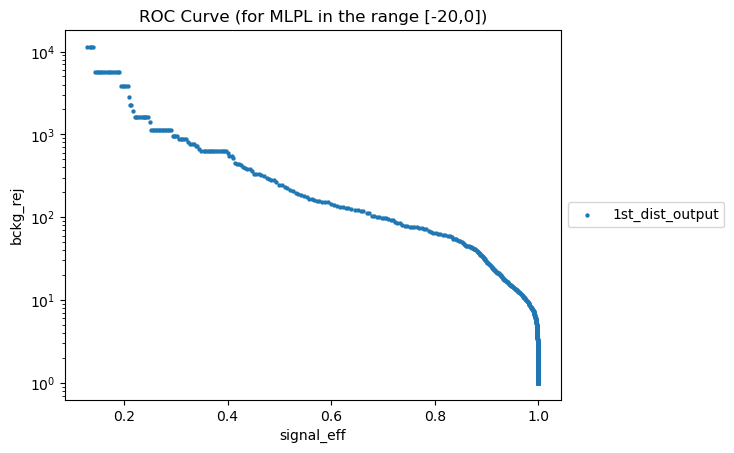

In [10]:
""" A standard implementation of the ROC Curve """ 
cut_array = np.linspace(-20, 0, num=1001)

signal = np.histogram(hh4b_dist, cut_array)[0]
background = np.histogram(jz0_dist, cut_array)[0]

sigeff = ( signal.sum() - signal[:].cumsum() ) / signal.sum()
#bckgrej = background[:].cumsum() / background.sum()
bckgeff = ( background.sum() - background[:].cumsum() ) / background.sum()
valid = (bckgeff > 0) & (sigeff > 0)
rej = 1/bckgeff[valid]
eff = sigeff[valid]


plt.scatter(eff,rej, alpha = 1, linewidths=0.1, marker = '.', label = '1st_dist_output')
#plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
#plt.xlim([0.4,1.05])
#plt.ylim([0.6,1.05])
plt.xlabel("signal_eff")
plt.ylabel("bckg_rej")
plt.show()

## Implementing the weighted sum of the JZ slices

In [52]:
""" Getting the weights"""
bin_no = 100
minimum = -20
maximum = 0 

# Choosing any algorithm
folder_name = '4oo5highest_dist'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

EB_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/EBdata_multiplicities.sav')
hh4b_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/hh4b_multiplicities.sav')
jz0_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz0_multiplicities.sav')
jz1_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz1_multiplicities.sav')
jz2_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz2_multiplicities.sav')
jz3_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz3_multiplicities.sav')
jz4_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz4_multiplicities.sav')
jz5_multiplicities = joblib.load('./' + 'dist_jet_multiplicities' + '/jz5_multiplicities.sav')

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

## 4ooAllhighest_dist

In [53]:
folder_name = '4ooAllhighest_dist'
EB_dist_4ooAllhighest_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist_4ooAllhighest_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

stacked_jz_weighted_sum_hist_4ooAllhighest_dist, stacked_jz_weighted_sum_edges_4ooAllhighest_dist = np.histogram(stacked_jz_slices, 
                                                                           weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

ValueError: x and y must have same first dimension, but have shapes (99,) and (101,)

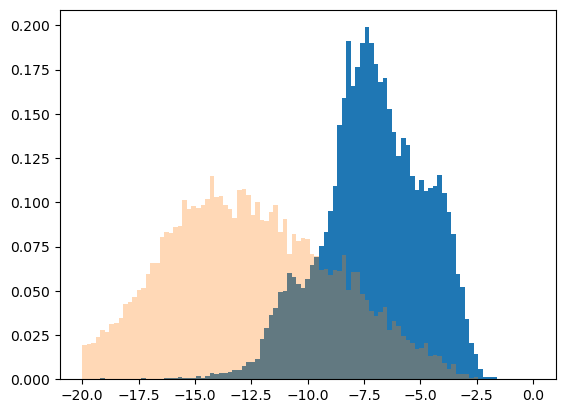

In [54]:
"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist_4ooAllhighest_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist_4ooAllhighest_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_hist_4ooAllhighest_dist[1:],stacked_jz_weighted_sum_edges_4ooAllhighest_dist, alpha=1, label='JZ_weighted_sum', color="green")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed discriminant variable (MLPL) distributions for the (" + folder_name + ") algorithm")
plt.xlabel("MLPL")
plt.show()

## 3ooAllhighest_dist

In [32]:
folder_name = '3ooAllhighest_dist'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

In [33]:
""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

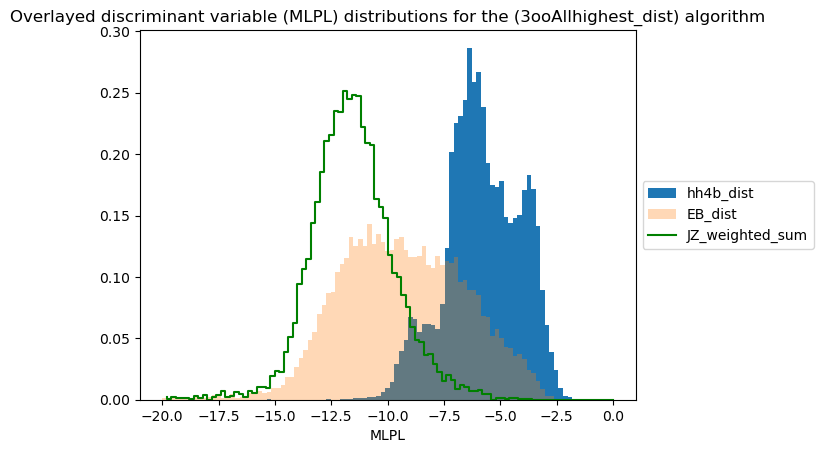

In [34]:
"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed discriminant variable (MLPL) distributions for the (" + folder_name + ") algorithm")
plt.xlabel("MLPL")
plt.show()

## 3oo5highest_dist

In [35]:
folder_name = '3oo5highest_dist'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

In [36]:
""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

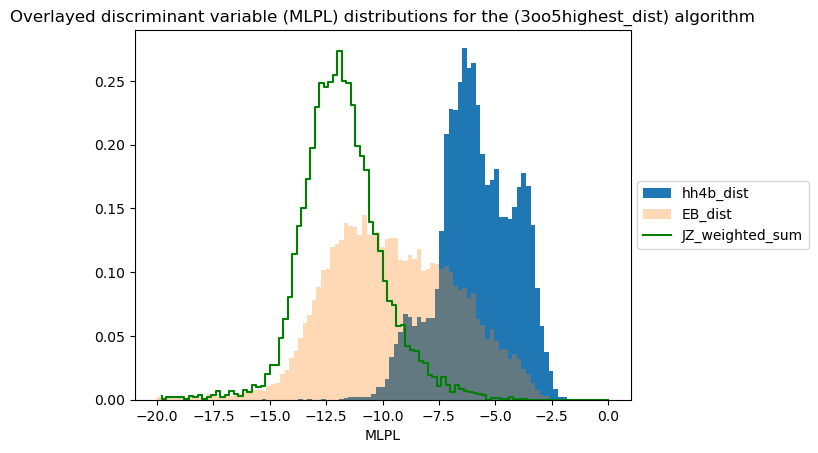

In [37]:
"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed discriminant variable (MLPL) distributions for the (" + folder_name + ") algorithm")
plt.xlabel("MLPL")
plt.show()

## 2ooAllhighest_dist

In [38]:
folder_name = '2ooAllhighest_dist'
EB_dist = joblib.load('./' + folder_name + '/EB_dist.sav')
hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

In [39]:
""" Doing the weighted sum of the JZ slices"""
bin_no = 100
minimum = -20
maximum = 0 

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

stacked_jz_slices = jz0_dist + jz1_dist + jz2_dist + jz3_dist + jz4_dist + jz5_dist
stacked_jz_weights = weights_jz0 + weights_jz1 + weights_jz2 + weights_jz3 + weights_jz4 + weights_jz5  

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
stacked_jz_weighted_sum_hist, stacked_jz_weighted_sum_edges = np.histogram(stacked_jz_slices, weights=stacked_jz_weights, bins = bin_no, range = (minimum, maximum), density = True)

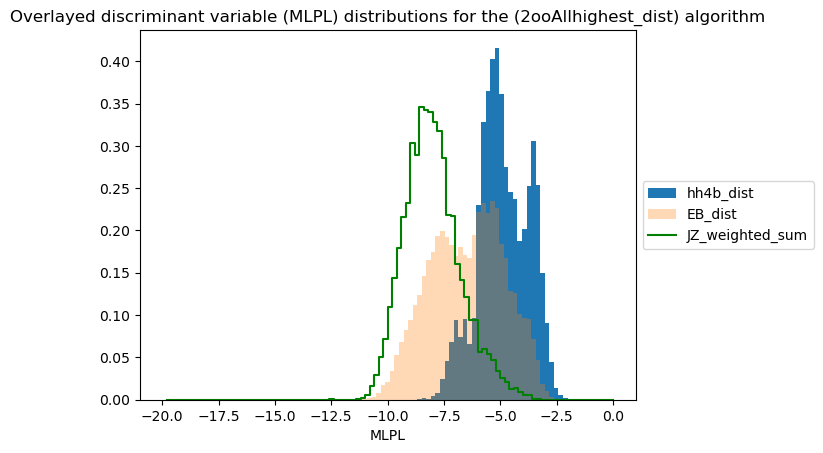

In [40]:
"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist', histtype='stepfilled', density=True)
plt.hist(EB_dist, bins, alpha=0.3, label='EB_dist', histtype='stepfilled', density=True)
plt.step(stacked_jz_weighted_sum_edges[1:],stacked_jz_weighted_sum_hist, alpha=1, label='JZ_weighted_sum', color="green")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed discriminant variable (MLPL) distributions for the (" + folder_name + ") algorithm")
plt.xlabel("MLPL")
plt.show()

## Comparing ROC Curves for different algorithms with background being the weighted sum of the JZ slices

### Setting up the plots

In [26]:
bin_no = 100
minimum = -20
maximum = 0 

#Cut array
cut_array = np.linspace(-20, 0, num=101)

# Corrects for the difference in the starting number of events in the samples
norm_jz0 = 50000 / len(jz0_multiplicities)
norm_jz1 = 50000 / len(jz1_multiplicities)
norm_jz2 = 50000 / len(jz2_multiplicities)
norm_jz3 = 50000 / len(jz3_multiplicities)
norm_jz4 = 50000 / len(jz4_multiplicities)
norm_jz5 = 50000 / len(jz5_multiplicities)


# Corrects for the effect of the preselection we make before getting the MLPL distributions
jz0_eff_pres = len(jz0_dist) / len(jz0_multiplicities)
jz1_eff_pres = len(jz1_dist) / len(jz1_multiplicities)
jz2_eff_pres = len(jz2_dist) / len(jz2_multiplicities)
jz3_eff_pres = len(jz3_dist) / len(jz3_multiplicities)
jz4_eff_pres = len(jz4_dist) / len(jz4_multiplicities)
jz5_eff_pres = len(jz5_dist) / len(jz5_multiplicities)


weights_jz0 = np.full_like(jz0_dist,norm_jz0 * jz0_eff_pres * 0.7651165653000001).tolist()
weights_jz1 = np.full_like(jz1_dist,norm_jz1 * jz1_eff_pres * 0.0032993956809600007).tolist()
weights_jz2 = np.full_like(jz2_dist,norm_jz2 * jz2_eff_pres * 2.6009622717000003e-05).tolist()
weights_jz3 = np.full_like(jz3_dist,norm_jz3 * jz3_eff_pres * 3.3590422200000005e-07).tolist()
weights_jz4 = np.full_like(jz4_dist,norm_jz4 * jz4_eff_pres * 3.8673973868e-09).tolist()
weights_jz5 = np.full_like(jz5_dist,norm_jz5 * jz5_eff_pres * 7.7799492096e-11).tolist()

In [27]:
""" Doing the weighted sum of the JZ slices for (4ooAllhighest_dist) Algorithm"""
folder_name = '4ooAllhighest_dist'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_4ooAllhighest_dist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist

signal_4ooAllhighest_dist = np.histogram(hh4b_dist, cut_array)[0]
background_4ooAllhighest_dist = jz_weighted_sum_hist_4ooAllhighest_dist
sigeff_4ooAllhighest_dist = ( signal_4ooAllhighest_dist.sum() - signal_4ooAllhighest_dist[:].cumsum() ) / signal_4ooAllhighest_dist.sum()
bckgrej_4ooAllhighest_dist = background_4ooAllhighest_dist[:].cumsum() / background_4ooAllhighest_dist.sum()

bckgeff_4ooAllhighest_dist = ( background_4ooAllhighest_dist.sum() - background_4ooAllhighest_dist[:].cumsum() ) / background_4ooAllhighest_dist.sum()
valid = (bckgeff_4ooAllhighest_dist > 0) & (sigeff_4ooAllhighest_dist > 0)
rej_4ooAllhighest_dist = 1/bckgeff_4ooAllhighest_dist[valid]
eff_4ooAllhighest_dist = sigeff_4ooAllhighest_dist[valid]

In [28]:
""" Doing the weighted sum of the JZ slices for (4oo5highest_dist) Algorithm"""
folder_name = '4oo5highest_dist'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_4oo5highest_dist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist

signal_4oo5highest_dist = np.histogram(hh4b_dist, cut_array)[0]
background_4oo5highest_dist = jz_weighted_sum_hist_4oo5highest_dist
sigeff_4oo5highest_dist = ( signal_4oo5highest_dist.sum() - signal_4oo5highest_dist[:].cumsum() ) / signal_4oo5highest_dist.sum()
bckgrej_4oo5highest_dist = background_4oo5highest_dist[:].cumsum() / background_4oo5highest_dist.sum()

bckgeff_4oo5highest_dist = ( background_4oo5highest_dist.sum() - background_4oo5highest_dist[:].cumsum() ) / background_4oo5highest_dist.sum()
valid = (bckgeff_4oo5highest_dist > 0) & (sigeff_4oo5highest_dist > 0)
rej_4oo5highest_dist = 1/bckgeff_4oo5highest_dist[valid]
eff_4oo5highest_dist = sigeff_4oo5highest_dist[valid]

In [29]:
""" Doing the weighted sum of the JZ slices for (4oo6highest_dist) Algorithm"""
folder_name = '4oo6highest_dist'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_4oo6highest_dist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist

signal_4oo6highest_dist = np.histogram(hh4b_dist, cut_array)[0]
background_4oo6highest_dist = jz_weighted_sum_hist_4oo6highest_dist
sigeff_4oo6highest_dist = ( signal_4oo6highest_dist.sum() - signal_4oo6highest_dist[:].cumsum() ) / signal_4oo6highest_dist.sum()
bckgrej_4oo6highest_dist = background_4oo6highest_dist[:].cumsum() / background_4oo6highest_dist.sum()

bckgeff_4oo6highest_dist = ( background_4oo6highest_dist.sum() - background_4oo6highest_dist[:].cumsum() ) / background_4oo6highest_dist.sum()
valid = (bckgeff_4oo6highest_dist > 0) & (sigeff_4oo6highest_dist > 0)
rej_4oo6highest_dist = 1/bckgeff_4oo6highest_dist[valid]
eff_4oo6highest_dist = sigeff_4oo6highest_dist[valid]

In [30]:
""" Doing the weighted sum of the JZ slices for (3ooAllhighest_dist) Algorithm"""
folder_name = '3ooAllhighest_dist'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_3ooAllhighest_dist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
signal_3ooAllhighest_dist = np.histogram(hh4b_dist, cut_array)[0]
background_3ooAllhighest_dist = jz_weighted_sum_hist_3ooAllhighest_dist
sigeff_3ooAllhighest_dist = ( signal_3ooAllhighest_dist.sum() - signal_3ooAllhighest_dist[:].cumsum() ) / signal_3ooAllhighest_dist.sum()
bckgrej_3ooAllhighest_dist = background_3ooAllhighest_dist[:].cumsum() / background_3ooAllhighest_dist.sum()

bckgeff_3ooAllhighest_dist = ( background_3ooAllhighest_dist.sum() - background_3ooAllhighest_dist[:].cumsum() ) / background_3ooAllhighest_dist.sum()
valid = (bckgeff_3ooAllhighest_dist > 0) & (sigeff_3ooAllhighest_dist > 0)
rej_3ooAllhighest_dist = 1/bckgeff_3ooAllhighest_dist[valid]
eff_3ooAllhighest_dist = sigeff_3ooAllhighest_dist[valid]

In [31]:
""" Doing the weighted sum of the JZ slices for (3oo5highest_dist) Algorithm"""
folder_name = '3oo5highest_dist'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_3oo5highest_dist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
signal_3oo5highest_dist = np.histogram(hh4b_dist, cut_array)[0]
background_3oo5highest_dist = jz_weighted_sum_hist_3oo5highest_dist
sigeff_3oo5highest_dist = ( signal_3oo5highest_dist.sum() - signal_3oo5highest_dist[:].cumsum() ) / signal_3oo5highest_dist.sum()
bckgrej_3oo5highest_dist = background_3oo5highest_dist[:].cumsum() / background_3oo5highest_dist.sum()

bckgeff_3oo5highest_dist = ( background_3oo5highest_dist.sum() - background_3oo5highest_dist[:].cumsum() ) / background_3oo5highest_dist.sum()
valid = (bckgeff_3oo5highest_dist > 0) & (sigeff_3oo5highest_dist > 0)
rej_3oo5highest_dist = 1/bckgeff_3oo5highest_dist[valid]
eff_3oo5highest_dist = sigeff_3oo5highest_dist[valid]

In [32]:
""" Doing the weighted sum of the JZ slices for (2ooAllhighest_dist) Algorithm"""
folder_name = '2ooAllhighest_dist'

hh4b_dist = joblib.load('./' + folder_name + '/hh4b_dist_nofake.sav')
jz0_dist = joblib.load('./' + folder_name + '/jz0_dist.sav')
jz1_dist = joblib.load('./' + folder_name + '/jz1_dist.sav')
jz2_dist = joblib.load('./' + folder_name + '/jz2_dist.sav')
jz3_dist = joblib.load('./' + folder_name + '/jz3_dist.sav')
jz4_dist = joblib.load('./' + folder_name + '/jz4_dist.sav')
jz5_dist = joblib.load('./' + folder_name + '/jz5_dist.sav')

weighted_jz0_hist, jz0_bin_edges = np.histogram(jz0_dist, weights=weights_jz0, bins = bin_no, range = (minimum, maximum))
weighted_jz1_hist, jz1_bin_edges = np.histogram(jz1_dist, weights=weights_jz1, bins = bin_no, range = (minimum, maximum))
weighted_jz2_hist, jz2_bin_edges = np.histogram(jz2_dist, weights=weights_jz2, bins = bin_no, range = (minimum, maximum))
weighted_jz3_hist, jz3_bin_edges = np.histogram(jz3_dist, weights=weights_jz3, bins = bin_no, range = (minimum, maximum))
weighted_jz4_hist, jz4_bin_edges = np.histogram(jz4_dist, weights=weights_jz4, bins = bin_no, range = (minimum, maximum))
weighted_jz5_hist, jz5_bin_edges = np.histogram(jz5_dist, weights=weights_jz5, bins = bin_no, range = (minimum, maximum))

jz_weighted_sum_hist_2ooAllhighest_dist = weighted_jz0_hist + weighted_jz1_hist + weighted_jz2_hist + weighted_jz3_hist + weighted_jz4_hist + weighted_jz5_hist
signal_2ooAllhighest_dist = np.histogram(hh4b_dist, cut_array)[0]
background_2ooAllhighest_dist = jz_weighted_sum_hist_2ooAllhighest_dist
sigeff_2ooAllhighest_dist = ( signal_2ooAllhighest_dist.sum() - signal_2ooAllhighest_dist[:].cumsum() ) / signal_2ooAllhighest_dist.sum()
bckgrej_2ooAllhighest_dist = background_2ooAllhighest_dist[:].cumsum() / background_2ooAllhighest_dist.sum()

bckgeff_2ooAllhighest_dist = ( background_2ooAllhighest_dist.sum() - background_2ooAllhighest_dist[:].cumsum() ) / background_2ooAllhighest_dist.sum()
valid = (bckgeff_2ooAllhighest_dist > 0) & (sigeff_2ooAllhighest_dist > 0)
rej_2ooAllhighest_dist = 1/bckgeff_2ooAllhighest_dist[valid]
eff_2ooAllhighest_dist = sigeff_2ooAllhighest_dist[valid]

### Plotting

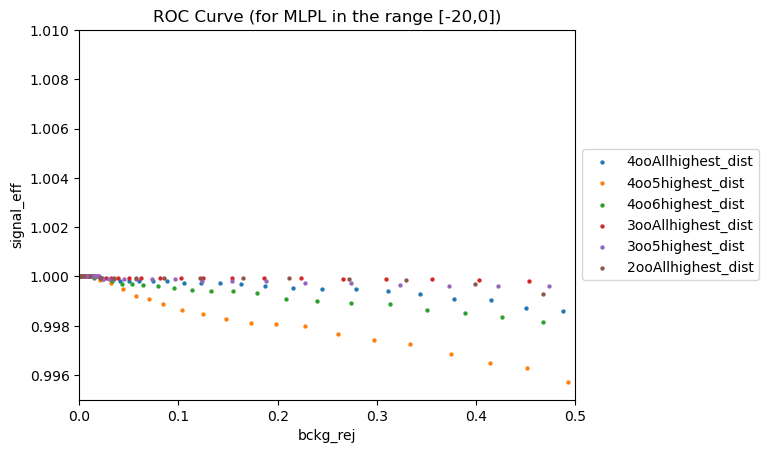

In [34]:
""" ROC Curve Implementation with the background being the weighted sum of the JZ slices """ 
cut_array = np.linspace(-20, 0, num=101)

plt.scatter(bckgrej_4ooAllhighest_dist,sigeff_4ooAllhighest_dist, alpha = 1, linewidths=0.1, marker = '.', label = '4ooAllhighest_dist')
plt.scatter(bckgrej_4oo5highest_dist,sigeff_4oo5highest_dist, alpha = 1, linewidths=0.1, marker = '.', label = '4oo5highest_dist')
plt.scatter(bckgrej_4oo6highest_dist,sigeff_4oo6highest_dist, alpha = 1, linewidths=0.1, marker = '.', label = '4oo6highest_dist')
plt.scatter(bckgrej_3ooAllhighest_dist,sigeff_3ooAllhighest_dist, alpha = 1, linewidths=0.1, marker = '.', label = '3ooAllhighest_dist')
plt.scatter(bckgrej_3oo5highest_dist,sigeff_3oo5highest_dist, alpha = 1, linewidths=0.1, marker = '.', label = '3oo5highest_dist')
plt.scatter(bckgrej_2ooAllhighest_dist,sigeff_2ooAllhighest_dist, alpha = 1, linewidths=0.1, marker = '.', label = '2ooAllhighest_dist')
#plt.scatter(random_y,random_x, alpha = 0.5, linewidths=0.5, marker = '+', label = 'Random')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
plt.xlim([0.0,0.5])
plt.ylim([0.995,1.01])
plt.xlabel("bckg_rej")
plt.ylabel("signal_eff")
plt.show()

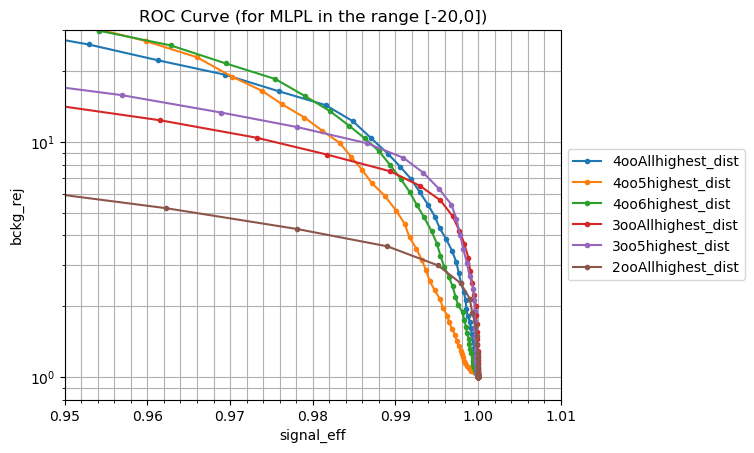

In [50]:
""" A standard implementation of the ROC Curve """ 
cut_array = np.linspace(-20, 0, num=101)

plt.plot(eff_4ooAllhighest_dist, rej_4ooAllhighest_dist, alpha = 1, marker = '.', label = '4ooAllhighest_dist')
plt.plot(eff_4oo5highest_dist, rej_4oo5highest_dist, alpha = 1, marker = '.', label = '4oo5highest_dist')
plt.plot(eff_4oo6highest_dist, rej_4oo6highest_dist, alpha = 1, marker = '.', label = '4oo6highest_dist')
plt.plot(eff_3ooAllhighest_dist, rej_3ooAllhighest_dist, alpha = 1, marker = '.', label = '3ooAllhighest_dist')
plt.plot(eff_3oo5highest_dist, rej_3oo5highest_dist, alpha = 1, marker = '.', label = '3oo5highest_dist')
plt.plot(eff_2ooAllhighest_dist, rej_2ooAllhighest_dist, alpha = 1, marker = '.', label = '2ooAllhighest_dist')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC Curve (for MLPL in the range [-20,0])")
plt.xlim([0.95,1.01])
plt.ylim([0.8,30])
plt.xlabel("signal_eff")
plt.ylabel("bckg_rej")
plt.grid()
#plt.figure(figsize=(100,100))
plt.grid(which = "minor")
plt.minorticks_on()
plt.show()

## Investigation of the number of bjets chosen in the hh->4b signal selection

In [66]:
""" for the 4ooAllhighest_dist"""
num_bjets_chosen_list = joblib.load('./' + '4ooAllhighest_dist' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (4ooAllhighest_dist) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (4ooAllhighest_dist) algorithm as follows: 
[[   0   35]
 [   1  207]
 [   2 2097]
 [   3 8630]
 [   4 8835]]


In [39]:
""" for the 4oo5highest_dist"""
num_bjets_chosen_list = joblib.load('./' + '4oo5highest_dist' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (4oo5highest_dist) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (4oo5highest_dist) algorithm as follows: 
[[   0    1]
 [   1  144]
 [   2 1851]
 [   3 8913]
 [   4 8895]]


In [40]:
""" for the 4oo6highest_dist"""
num_bjets_chosen_list = joblib.load('./' + '4oo6highest_dist' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (4oo6highest_dist) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (4oo6highest_dist) algorithm as follows: 
[[   0    8]
 [   1  153]
 [   2 2000]
 [   3 8715]
 [   4 8928]]


In [67]:
""" for the 3ooAllhighest_dist"""
num_bjets_chosen_list = joblib.load('./' + '3ooAllhighest_dist' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (3ooAllhighest_dist) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (3ooAllhighest_dist) algorithm as follows: 
[[    0    99]
 [    1   993]
 [    2  6496]
 [    3 12216]]


In [68]:
""" for the 3oo5highest_dist"""
num_bjets_chosen_list = joblib.load('./' + '3oo5highest_dist' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (3oo5highest_dist) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (3oo5highest_dist) algorithm as follows: 
[[    0    25]
 [    1   844]
 [    2  6295]
 [    3 12640]]


In [69]:
""" for the 2ooAllhighest_dist"""
num_bjets_chosen_list = joblib.load('./' + '2ooAllhighest_dist' + '/num_bjets_chosen_list.sav')
num_bjets_chosen_array = np.array(num_bjets_chosen_list)
unique, counts = np.unique(num_bjets_chosen_array, return_counts=True)
print("The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: " + str(len(num_bjets_chosen_list)))
print("They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (2ooAllhighest_dist) algorithm as follows: ")
print(np.asarray((unique, counts)).T)

The total number of events passing the preliminary selection (existence of at least 4 bjets in the event) is: 19804
They are distributed in terms of the number of bjets chosen in the highest MLLP combination for the (2ooAllhighest_dist) algorithm as follows: 
[[    0   520]
 [    1  4499]
 [    2 14785]]
